<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Data Mining</b></center>
<center><b><h1>Task-4 Apply Apriori on Online Retail Dataset</b></center>
<center><b><h1>137 | Vishal Baraiya | 23010101014</b></center>    
<pre>

# Apriori Algorithm Implementation Assignment

### Objective:
You will implement the **Apriori algorithm** from scratch (i.e., without using any libraries like `mlxtend`) to find frequent itemsets and generate association rules.

### Dataset:
Use the [Online Retail Dataset](https://www.kaggle.com/datasets/vijayuv/onlineretail) from Kaggle. You can filter it for a specific country (e.g., `United Kingdom`) and time range to reduce size if needed.

---

## Step 1: Data Preprocessing

- Load the dataset
- Remove rows with missing values
- Filter out rows where `Quantity <= 0`
- Convert Data into Basket Format

👉 **Implement code below**

### Load the dataset

In [1]:
import pandas as pd
from collections import defaultdict
from math import ceil
import matplotlib.pyplot as plt

In [2]:
OnlineRetail = pd.read_csv("D:\\VS_CODES\\DataMining\\ProjectDataMining\\Dataset\\OnlineRetail.csv", encoding='ISO-8859-1')
OnlineRetail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Preprocess as per the instructions above | We have already done in TASK 2

In [9]:
# Remove missing values from the CustomerID column
df = OnlineRetail.dropna(subset=['CustomerID'])

# Remove canceled orders, which start with 'C' in the InvoiceNo
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]

# Keep only positive quantities
df = df[df['Quantity'] > 0]

# Filter for a specific country to reduce dataset size
df = df[df['Country'] == 'United Kingdom']

# Strip leading/trailing whitespace from item descriptions
df['Description'] = df['Description'].str.strip()

# Now, create the basket format
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert to a binary (one-hot encoded) format
# basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket = (basket > 0).astype(int)
basket

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10404\2481650836.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2: Implement Apriori Algorithm
Step-by-Step Procedure:
1. Generate Frequent 1-Itemsets
Count the frequency (support) of each individual item in the dataset.
Keep only those with support ≥ min_support.
→ Result is L1 (frequent 1-itemsets)
2. Iterative Candidate Generation (k = 2 to n)
While L(k-1) is not empty:
a. Candidate Generation

Generate candidate itemsets Ck of size k from L(k-1) using the Apriori property:
Any (k-itemset) is only frequent if all of its (k−1)-subsets are frequent.
b. Prune Candidates
Eliminate candidates that have any (k−1)-subset not in L(k-1).
c. Count Support
For each transaction, count how many times each candidate in Ck appears.
d. Generate Frequent Itemsets
Form Lk by keeping candidates from Ck that meet the min_support.
Repeat until Lk becomes empty.
Implement the following functions:
1. `get_frequent_itemsets(transactions, min_support)` - Returns frequent itemsets and their support
2. `generate_candidates(prev_frequent_itemsets, k)` - Generates candidate itemsets of length `k`
3. `calculate_support(transactions, candidates)` - Calculates the support count for each candidate

**Write reusable functions** for each part of the algorithm.

In [4]:
def basket_to_transactions(basket_df):
    """
    Convert a 0/1 one-hot basket DataFrame (rows=invoices, cols=items)
    into a list of frozensets, one per transaction.
    """
    return [frozenset(row.index[row.gt(0)]) for _, row in basket_df.iterrows()]


def generate_candidates(prev_frequent_itemsets, k):
    """
    Join + prune step of Apriori (without itertools.combinations).
    prev_frequent_itemsets: iterable[frozenset] of size k-1
    k: target size of candidates
    returns: set[frozenset] of size-k candidates
    """
    prev_list = list(prev_frequent_itemsets)
    prev_set  = set(prev_list)
    candidates = set()

    for i in range(len(prev_list)):
        for j in range(i + 1, len(prev_list)):
            union = prev_list[i] | prev_list[j]
            if len(union) == k:
                # prune: all (k-1)-subsets must be frequent
                valid = True
                for item in union:
                    subset = union - frozenset([item])   # remove one element
                    if subset not in prev_set:
                        valid = False
                        break
                if valid:
                    candidates.add(union)
    return candidates


def calculate_support(transactions, candidates):
    """
    Count support (absolute frequency) of each candidate
    without itertools.combinations.
    transactions: list[frozenset]
    candidates: set[frozenset]
    returns: dict{candidate_frozenset: count}
    """
    counts = defaultdict(int)
    if not candidates:
        return counts

    for t in transactions:
        for cand in candidates:
            if cand.issubset(t):   # check directly if candidate is in transaction
                counts[cand] += 1
    return counts


def get_frequent_itemsets(transactions, min_support):
    """
    Run Apriori and return frequent itemsets.
    """
    n_tx = len(transactions)
    if n_tx == 0:
        return {}, {}

    if 0 < min_support < 1:
        min_count = ceil(min_support * n_tx)
    else:
        min_count = int(min_support)

    # Step 1: L1 singletons
    item_counts = defaultdict(int)
    for t in transactions:
        for item in t:
            item_counts[frozenset([item])] += 1

    Lk_counts = {it: c for it, c in item_counts.items() if c >= min_count}
    support_counts = dict(Lk_counts)
    prev_L = set(Lk_counts.keys())
    k = 2

    # Step 2: iterate
    while prev_L:
        Ck = generate_candidates(prev_L, k)
        Ck_counts = calculate_support(transactions, Ck)
        Lk_counts = {it: c for it, c in Ck_counts.items() if c >= min_count}

        support_counts.update(Lk_counts)
        prev_L = set(Lk_counts.keys())
        k += 1

    support = {it: c / n_tx for it, c in support_counts.items()}
    return support_counts, support


## Step 3: Generate Association Rules

- Use frequent itemsets to generate association rules
- For each rule `A => B`, calculate:
  - **Support**
  - **Confidence**
- Only return rules that meet a minimum confidence threshold (e.g., 0.5)

👉 **Implement rule generation function below**

In [5]:
def generate_association_rules(support_counts, support, min_confidence):
    """
    Generate association rules from frequent itemsets (without itertools.combinations).
    
    support_counts: dict{frozenset: count}
    support: dict{frozenset: relative_support}
    min_confidence: minimum confidence threshold
    
    returns: list of (antecedent, consequent, support, confidence, lift)
    """
    rules = []

    for itemset in support.keys():
        if len(itemset) < 2:
            continue  # skip singletons

        itemset_list = list(itemset)

        # generate all possible non-empty proper subsets manually
        n = len(itemset_list)
        for mask in range(1, 1 << n):  # from 1 to (2^n - 1)
            antecedent = frozenset([itemset_list[idx] for idx in range(n) if (mask & (1 << idx))])
            consequent = itemset - antecedent

            if not antecedent or not consequent:
                continue

            conf = support[itemset] / support[antecedent]
            if conf >= min_confidence:
                lift = conf / support[consequent]
                rules.append((antecedent, consequent, support[itemset], conf, lift))

    return rules


## Step 4: Output and Visualize

- Print top 10 frequent itemsets
- Print top 10 association rules (by confidence or lift)

👉 **Output results below**

### Print Top 10 Frequent Itemsets ( min_support=0.03 )

In [6]:
# Convert one-hot basket to transaction list
transactions = basket_to_transactions(basket)

# Run Apriori to get frequent itemsets
support_counts, support = get_frequent_itemsets(transactions, min_support=0.03)

print("Total frequent itemsets:", len(support))

# Sort frequent itemsets by support (descending)
top10_itemsets = sorted(support.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Frequent Itemsets:\n")
for items, sup in top10_itemsets:
    print(f"{tuple(sorted(items))} → support={sup:.4f} ({support_counts[items]} occurrences)")


Total frequent itemsets: 89
Top 10 Frequent Itemsets:

('WHITE HANGING HEART T-LIGHT HOLDER',) → support=0.1132 (1884 occurrences)
('JUMBO BAG RED RETROSPOT',) → support=0.0869 (1447 occurrences)
('REGENCY CAKESTAND 3 TIER',) → support=0.0847 (1410 occurrences)
('ASSORTED COLOUR BIRD ORNAMENT',) → support=0.0781 (1300 occurrences)
('PARTY BUNTING',) → support=0.0775 (1291 occurrences)
('LUNCH BAG RED RETROSPOT',) → support=0.0673 (1120 occurrences)
('SET OF 3 CAKE TINS PANTRY DESIGN',) → support=0.0605 (1007 occurrences)
('LUNCH BAG  BLACK SKULL.',) → support=0.0598 (996 occurrences)
("PAPER CHAIN KIT 50'S CHRISTMAS",) → support=0.0568 (945 occurrences)
('NATURAL SLATE HEART CHALKBOARD',) → support=0.0563 (938 occurrences)


### Print Top 10 Rules ( min_confidence=0.3 )

In [7]:
# Generate rules with minimum confidence threshold
rules = generate_association_rules(support_counts, support, min_confidence=0.3)

print("Generated rules:", len(rules))

# Sort by confidence (descending)
top10_rules = sorted(rules, key=lambda x: x[3], reverse=True)[:10]

print("\nTop 10 Association Rules (by confidence):\n")
for antecedent, consequent, sup, conf, lift in top10_rules:
    print(f"{tuple(sorted(antecedent))} → {tuple(sorted(consequent))} "
          f"[support={sup:.4f}, confidence={conf:.4f}, lift={lift:.4f}]")


Generated rules: 2

Top 10 Association Rules (by confidence):

('JUMBO BAG PINK POLKADOT',) → ('JUMBO BAG RED RETROSPOT',) [support=0.0304, confidence=0.6232, lift=7.1699]
('JUMBO BAG RED RETROSPOT',) → ('JUMBO BAG PINK POLKADOT',) [support=0.0304, confidence=0.3497, lift=7.1699]


### Visualization (Bar Chart of Supports)

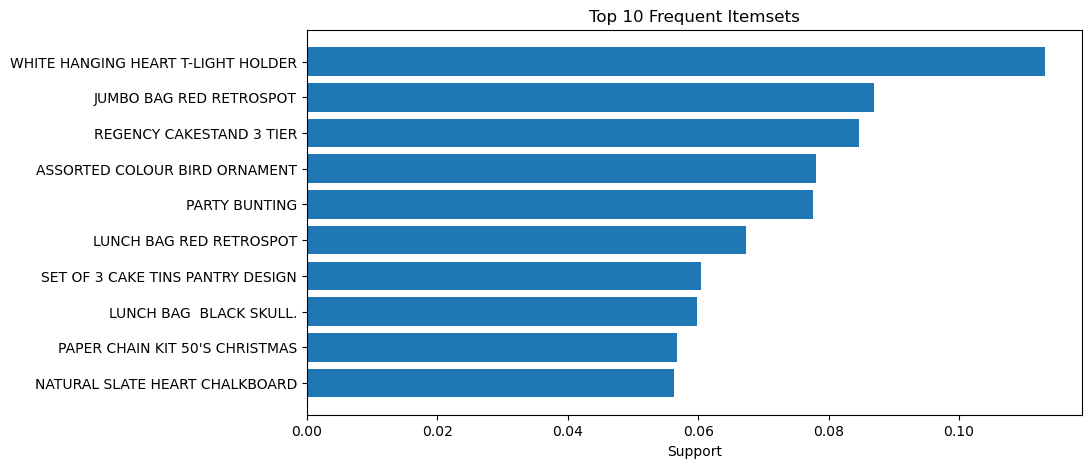

In [8]:
# Take top 10 itemsets
labels = ['+'.join(sorted(items)) for items, _ in top10_itemsets]
values = [sup for _, sup in top10_itemsets]

plt.figure(figsize=(10,5))
plt.barh(labels, values)
plt.xlabel("Support")
plt.title("Top 10 Frequent Itemsets")
plt.gca().invert_yaxis()
plt.show()
